In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import numpy as np
import random
#import sc_toolbox

import rpy2.rinterface_lib.callbacks
import anndata2ri
import logging

from rpy2.robjects import pandas2ri
from rpy2.robjects import r

sc.settings.verbosity = 0
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

pandas2ri.activate()
anndata2ri.activate()

%load_ext rpy2.ipython

In [2]:
import anndata2ri
import rpy2.rinterface_lib.callbacks
import logging

In [3]:
import anndata

In [6]:
%%R
library(edgeR)
#library(MAST)

In [7]:
adata = sc.read('all_nk_cells.h5ad')

In [9]:
adata.obs['label'] = adata.obs['reference']

In [10]:
#adata.obs['replicate'] = adata.obs['dataset']
adata.obs['replicate'] = [f'{x}_{y}' for x,y in zip(adata.obs['dataset'],adata.obs['source'])]

In [11]:
adata.obs['cell_type'] = adata.obs['lower_res_subset']

In [12]:
np.max(adata.X)

6323.0

In [13]:
adata.layers["counts"] = adata.X.copy()

In [14]:
adata.obs["replicate"] = adata.obs["replicate"].astype("category")


In [15]:
print(len(adata[adata.obs["label"] == "reference"].obs["replicate"].cat.categories))
print(len(adata[adata.obs["label"] == "query"].obs["replicate"].cat.categories))

23
38


In [16]:
adata

AnnData object with n_obs × n_vars = 89604 × 11866
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'sample', 'batch', 'subset', 'dataset', 'source', 'tumor_type', 'label', '_scvi_batch', '_scvi_labels', 'subset_source', 'subset_only', 'source_only', 'low_res_subset', 'low_res_subset_source', 'lower_res_subset', 'Tissue residency_auc', 'reference', 'reference_subset', 'replicate', 'cell_type'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'low_res_subset_colors', 'neighbors', 'paga', 'source_colors', 'subset_colors', 'subset_only_colors', 'subset_only_sizes', 'subset_source_colors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [17]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata

AnnData object with n_obs × n_vars = 89216 × 11866
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'sample', 'batch', 'subset', 'dataset', 'source', 'tumor_type', 'label', '_scvi_batch', '_scvi_labels', 'subset_source', 'subset_only', 'source_only', 'low_res_subset', 'low_res_subset_source', 'lower_res_subset', 'Tissue residency_auc', 'reference', 'reference_subset', 'replicate', 'cell_type', 'n_genes'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'low_res_subset_colors', 'neighbors', 'paga', 'source_colors', 'subset_colors', 'subset_only_colors', 'subset_only_sizes', 'subset_source_colors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [19]:
adata.obs["sample"] = [
    f"{rep}_{l}" for rep, l in zip(adata.obs["replicate"], adata.obs["label"])
]

In [20]:
adata.obs["replicate"] = adata.obs["replicate"].astype("category")
adata.obs["label"] = adata.obs["label"].astype("category")
adata.obs["sample"] = adata.obs["sample"].astype("category")
adata.obs["cell_type"] = adata.obs["cell_type"].astype("category")

In [21]:
adata.obs['reference'] = adata.obs["reference"].astype("category")

In [22]:
adata.obs["condition"] = adata.obs['reference']

In [23]:
adata.obsm['X_pca'] = adata.obsm['X_scVI'].copy()

In [24]:
anndata2ri.activate()

In [25]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [26]:
#%%R
#devtools::install_github("MarioniLab/miloR")

In [27]:
%%R
library(miloR)
library(igraph)

In [28]:
adata.obs['dataset']

AAACCTGAGTGTCCAT_1-0                        malm
AAACCTGCACATGGGA_1-0                        malm
AAACCTGCACCTCGGA_1-0                        malm
AAACCTGGTTGAGTTC_1-0                        malm
AAACCTGTCACCGTAA_1-0                        malm
                                          ...   
TAAACCGTCTGGGCCA-1_GSM5293920_smalley    smalley
TCTGGAAGTAGGACAC-1_GSM5293920_smalley    smalley
TGACAACTCTCAAACG-1_GSM5293920_smalley    smalley
TGCTGCTGTGCTCTTC-1_GSM5293920_smalley    smalley
TTCTCAAAGACTAGAT-1_GSM5293920_smalley    smalley
Name: dataset, Length: 89216, dtype: category
Categories (47, object): ['GSE212966', 'abdelfattah', 'amir', 'bassez', ..., 'yang', 'zhang', 'zhou', 'zilionis']

In [29]:
d = 30
k = 200

In [30]:
sc.pp.neighbors(adata, use_rep='X_scVI', n_neighbors=k, n_pcs=d)

/home/ubuntu/miniconda3/envs/scenic/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/miniconda3/envs/scenic/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/ubuntu/miniconda3/envs/scenic/lib/python3.9/site-packages/umap/d

In [29]:
adata_no_knn = adata.copy()
adata_no_knn.obsp = None
adata_no_knn.uns.pop("neighbors")
adata_no_knn

AnnData object with n_obs × n_vars = 89216 × 11866
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'sample', 'batch', 'subset', 'dataset', 'source', 'tumor_type', 'label', '_scvi_batch', '_scvi_labels', 'subset_source', 'subset_only', 'source_only', 'low_res_subset', 'low_res_subset_source', 'lower_res_subset', 'Tissue residency_auc', 'reference', 'reference_subset', 'replicate', 'cell_type', 'n_genes', 'condition'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'low_res_subset_colors', 'paga', 'source_colors', 'subset_colors', 'subset_only_colors', 'subset_only_sizes', 'subset_source_colors', 'umap'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    layers: 'counts'

In [30]:
adata_no_knn

AnnData object with n_obs × n_vars = 89216 × 11866
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'sample', 'batch', 'subset', 'dataset', 'source', 'tumor_type', 'label', '_scvi_batch', '_scvi_labels', 'subset_source', 'subset_only', 'source_only', 'low_res_subset', 'low_res_subset_source', 'lower_res_subset', 'Tissue residency_auc', 'reference', 'reference_subset', 'replicate', 'cell_type', 'n_genes', 'condition'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'low_res_subset_colors', 'paga', 'source_colors', 'subset_colors', 'subset_only_colors', 'subset_only_sizes', 'subset_source_colors', 'umap'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    layers: 'counts'

In [31]:
%%R -i adata_no_knn
adata_no_knn

class: SingleCellExperiment 
dim: 11866 89216 
metadata(10): _scvi_manager_uuid _scvi_uuid ... subset_source_colors
  umap
assays(2): X counts
rownames(11866): LINC00115 SAMD11 ... S100B PRMT2
rowData names(1): n_cells
colnames(89216): AAACCTGAGTGTCCAT_1-0 AAACCTGCACATGGGA_1-0 ...
  TGCTGCTGTGCTCTTC-1_GSM5293920_smalley
  TTCTCAAAGACTAGAT-1_GSM5293920_smalley
colData names(25): total_counts n_genes_by_counts ... n_genes condition
reducedDimNames(3): X_scVI UMAP PCA
mainExpName: NULL
altExpNames(0):


In [34]:
%%R 
milo <- Milo(adata_no_knn)
milo

class: Milo 
dim: 11866 89216 
metadata(10): _scvi_manager_uuid _scvi_uuid ... subset_source_colors
  umap
assays(2): X counts
rownames(11866): LINC00115 SAMD11 ... S100B PRMT2
rowData names(1): n_cells
colnames(89216): AAACCTGAGTGTCCAT_1-0 AAACCTGCACATGGGA_1-0 ...
  TGCTGCTGTGCTCTTC-1_GSM5293920_smalley
  TTCTCAAAGACTAGAT-1_GSM5293920_smalley
colData names(25): total_counts n_genes_by_counts ... n_genes condition
reducedDimNames(3): X_scVI UMAP PCA
mainExpName: NULL
altExpNames(0):
nhoods dimensions(2): 1 1
nhoodCounts dimensions(2): 1 1
nhoodDistances dimension(1): 0
graph names(0):
nhoodIndex names(1): 0
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(0):
nhoodAdjacency dimension(2): 1 1


In [119]:
%%R
milo@colData$subset_new <- adata_no_knn@colData$subset_new

In [11]:
%%R
milo

class: Milo 
dim: 11866 89216 
metadata(10): _scvi_manager_uuid _scvi_uuid ... subset_source_colors
  umap
assays(3): X counts logcounts
rownames(11866): LINC00115 SAMD11 ... S100B PRMT2
rowData names(1): n_cells
colnames(89216): AAACCTGAGTGTCCAT_1-0 AAACCTGCACATGGGA_1-0 ...
  TGCTGCTGTGCTCTTC-1_GSM5293920_smalley
  TTCTCAAAGACTAGAT-1_GSM5293920_smalley
colData names(26): total_counts n_genes_by_counts ... condition
  sizeFactor
reducedDimNames(3): X_scVI UMAP PCA
mainExpName: NULL
altExpNames(0):
nhoods dimensions(2): 89216 6505
nhoodCounts dimensions(2): 6505 61
nhoodDistances dimension(1): 6505
graph names(1): graph
nhoodIndex names(1): 6505
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(1): nhoodGraph
nhoodAdjacency dimension(2): 6505 6505


In [39]:
%%R 
milo <- buildGraph(milo, k=200, d=30)


In [182]:
design_df = adata.obs[["sample","dataset","condition"]]
design_df.drop_duplicates(inplace=True)
design_df.index = design_df['sample']
design_df

/tmp/ipykernel_306781/439440423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  design_df.drop_duplicates(inplace=True)


,sample,dataset,condition
sample,,,
malm_PBMC_reference,malm_PBMC_reference,malm,reference
amir_PBMC_reference,amir_PBMC_reference,amir,reference
crinier_PBMC_reference,crinier_PBMC_reference,crinier,reference
yang_PBMC_reference,yang_PBMC_reference,yang,reference
leader_cite_lung_normal_reference,leader_cite_lung_normal_reference,leader_cite,reference
...,...,...,...
heidegger_prostate_tumor_query,heidegger_prostate_tumor_query,heidegger,query
tuong_prostate_tumor_query,tuong_prostate_tumor_query,tuong,query
chen_prostate_tumor_query,chen_prostate_tumor_query,chen,query


In [ ]:
%%R -i design_df -o DA_results
## Define neighbourhoods
milo <- makeNhoods(milo, prop = 0.1, k = 200, d=30, refined = TRUE)

## Count cells in neighbourhoods
milo <- countCells(milo, meta.data = data.frame(colData(milo)), sample="sample")

## Calculate distances between cells in neighbourhoods
## for spatial FDR correction
milo <- calcNhoodDistance(milo, d=30)

DA_results <- testNhoods(milo, design = ~ condition, design.df = design_df)

In [ ]:
%%R
plotNhoodSizeHist(milo)

In [54]:
%%R
library(dplyr)
library(patchwork)
library(ggplot2)

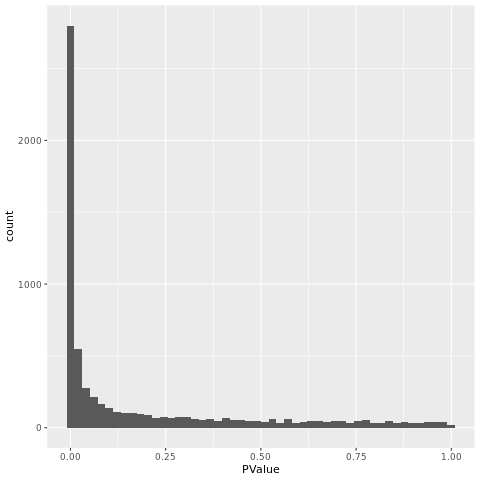

In [111]:
%%R
ggplot(DA_results, aes(PValue)) + geom_histogram(bins=50)

In [120]:
%%R
ggplot(DA_results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = -log10(0.05)) ## Mark significance threshold (10% FDR)
ggsave('fc_p_val_da_res.pdf')

Saving 6.67 x 6.67 in image


In [116]:
DA_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
1,-5.379887,9.458160,47.702305,3.347809e-11,1.192819e-08,1.0,1.227004e-08
2,0.763624,8.479534,2.264039,1.333376e-01,2.038376e-01,2.0,2.047129e-01
3,-2.580490,8.304910,18.043950,2.822419e-05,2.017564e-04,3.0,2.077594e-04
4,1.890607,8.443885,13.410346,2.901233e-04,1.295300e-03,4.0,1.326284e-03
5,-2.675304,9.018581,17.503733,3.883681e-05,2.578762e-04,5.0,2.653914e-04
...,...,...,...,...,...,...,...
6501,1.536477,7.943395,9.894289,1.804372e-03,5.697788e-03,6501.0,5.800828e-03
6502,-0.274981,7.889240,0.297703,5.857209e-01,6.706767e-01,6502.0,6.714366e-01
6503,2.065931,7.638615,17.970023,2.895593e-05,2.056313e-04,6503.0,2.117850e-04
6504,1.702752,7.358280,12.362169,4.975788e-04,1.998772e-03,6504.0,2.044099e-03


In [119]:
np.sum(DA_results['SpatialFDR'] < 0.05)

3249

In [ ]:
%%R
milo <- buildNhoodGraph(milo)


In [110]:
%%R -w 1000 -h 800
plotNhoodGraphDA(milo, DA_results, alpha=0.05)
ggsave('milo_nhood_graph.png')

Saving 13.9 x 11.1 in image


In [121]:
%%R -w 1000 -h 800
plotNhoodGraphDA(milo, DA_results, alpha=0.05)
ggsave('milo_nhood_graph.pdf')

Saving 13.9 x 11.1 in image


In [ ]:
%%R
saveRDS(milo, file = "/tumor-data/milo.rds")

In [33]:
%%R
library(SingleCellExperiment)
library(scater)
#library(scran)

In [ ]:
%%R
## Plot single-cell UMAP
umap_pl <- plotReducedDim(milo, dimred = "UMAP", colour_by="condition", text_by = "condition", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none")

## Plot neighbourhood graph
nh_graph_pl <- plotNhoodGraphDA(milo, DA_results, layout="UMAP",alpha=0.05) 
  
umap_pl + nh_graph_pl +
  plot_layout(guides="collect")
    
ggsave('umap_and_nhood_graph.pdf')

In [54]:
adata

AnnData object with n_obs × n_vars = 89216 × 11866
    obs: 'total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'sample', 'batch', 'subset', 'dataset', 'source', 'tumor_type', 'label', '_scvi_batch', '_scvi_labels', 'subset_source', 'subset_only', 'source_only', 'low_res_subset', 'low_res_subset_source', 'lower_res_subset', 'Tissue residency_auc', 'reference', 'reference_subset', 'replicate', 'cell_type', 'n_genes', 'condition'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'low_res_subset_colors', 'neighbors', 'paga', 'source_colors', 'subset_colors', 'subset_only_colors', 'subset_only_sizes', 'subset_source_colors', 'umap'
    obsm: 'X_scVI', 'X_umap', 'X_pca'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [63]:
DA_results.to_csv('DA_results.csv')

In [64]:
DA_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
1,-5.379887,9.458160,47.702305,3.347809e-11,1.192819e-08,1.0,1.227004e-08
2,0.763624,8.479534,2.264039,1.333376e-01,2.038376e-01,2.0,2.047129e-01
3,-2.580490,8.304910,18.043950,2.822419e-05,2.017564e-04,3.0,2.077594e-04
4,1.890607,8.443885,13.410346,2.901233e-04,1.295300e-03,4.0,1.326284e-03
5,-2.675304,9.018581,17.503733,3.883681e-05,2.578762e-04,5.0,2.653914e-04
...,...,...,...,...,...,...,...
6501,1.536477,7.943395,9.894289,1.804372e-03,5.697788e-03,6501.0,5.800828e-03
6502,-0.274981,7.889240,0.297703,5.857209e-01,6.706767e-01,6502.0,6.714366e-01
6503,2.065931,7.638615,17.970023,2.895593e-05,2.056313e-04,6503.0,2.117850e-04
6504,1.702752,7.358280,12.362169,4.975788e-04,1.998772e-03,6504.0,2.044099e-03


In [61]:
%%R
library(miloR)

In [126]:
%%R
DA_results <- annotateNhoods(milo, DA_results, coldata_col = "subset_new")
head(DA_results)

       logFC   logCPM          F       PValue          FDR Nhood   SpatialFDR
1 -5.3798866 9.458160 47.7023050 3.347809e-11 1.192819e-08     1 1.227004e-08
2  0.7636238 8.479534  2.2640390 1.333376e-01 2.038376e-01     2 2.047129e-01
3 -2.5804897 8.304910 18.0439495 2.822419e-05 2.017564e-04     3 2.077594e-04
4  1.8906074 8.443885 13.4103457 2.901233e-04 1.295300e-03     4 1.326284e-03
5 -2.6753041 9.018581 17.5037331 3.883681e-05 2.578762e-04     5 2.653914e-04
6  0.2292672 7.751153  0.2369278 6.267478e-01 7.088678e-01     6 7.094993e-01
    low_res_subset low_res_subset_fraction         celltype NhoodGroup
1 tumor CD56bright               0.7789374 tumor CD56bright          1
2   tissue CD56dim               0.4231379            Mixed          2
3 tumor CD56bright               0.8047619 tumor CD56bright          3
4          CD56dim               0.5515289            Mixed          4
5 tumor CD56bright               0.8357964 tumor CD56bright          3
6   tissue CD56dim          

In [151]:
%%R
DA_results$condition <- ifelse(DA_results$condition_fraction < 0.7, "Mixed", DA_results$condition)

In [49]:
%%R
DA_results$low_res_subset_celltype <- ifelse(DA_results$low_res_subset_fraction < 0.7, "Mixed", DA_results$low_res_subset)

In [372]:
#%%R -i design_df
#plotNhoodCounts(x=milo,
#                subset.nhoods = c(1,2),
#                design.df=design_df,
#                condition='condition')

#### Group neighborhoods

In [88]:
%%R
library(scran)

In [89]:
%%R
milo <- logNormCounts(milo)

In [93]:
%%R
## Exclude zero counts genes
keep.rows <- rowSums(logcounts(milo)) != 0
milo <- milo[keep.rows, ]

## Find HVGs
#dec <- modelGeneVar(embryo_milo)
#hvgs <- getTopHVGs(dec, n=2000)
#head(hvgs)

In [96]:
%%R
nhood_markers <- findNhoodGroupMarkers(milo, DA_results, #subset.row = hvgs, 
                                       aggregate.samples = TRUE, sample_col = "sample")

In [127]:
%%R
tumor_bright_markers <- nhood_markers[c('GeneID', "logFC_tumor CD56bright", "adj.P.Val_tumor CD56bright")] 
colnames(tumor_bright_markers) <- c('GeneID', "logFC", "adj.P.Val")

head(tumor_bright_markers[order(tumor_bright_markers$adj.P.Val), ], n=20)

         GeneID      logFC    adj.P.Val
11134      XCL1  1.0408104 1.177340e-20
3589       FOSB  1.1303748 3.414912e-19
11135      XCL2  1.0205021 1.002647e-16
5213  LINC00996  0.2980148 1.463952e-14
1003       BCO2  0.1117892 1.243241e-13
1536       CD44  0.7387034 1.243241e-13
6532      NR4A1  0.4967752 2.068213e-11
4131       GZMK  0.7304825 4.974316e-11
3588        FOS  1.3051371 3.774086e-10
7524   PPP1R15A  0.6589802 3.774086e-10
8507     S100A4 -0.9773912 1.333393e-09
4007     GPR183  0.3925189 1.339666e-09
3458     FCGR3A -0.7934851 1.021779e-08
2096      COTL1  0.4213856 1.926341e-08
3897       GNAQ  0.1122303 2.024361e-08
3503     FGFBP2 -0.8728091 2.441262e-08
2799      DUSP4  0.3550386 2.967704e-08
3737      GATA3  0.2870597 3.196318e-08
2229       CST7 -0.8243777 3.629073e-08
10122   TMEM14C  0.1789982 3.885433e-08


In [102]:
%%R
pb_dim_markers <- nhood_markers[c('GeneID', "logFC_CD56dim", "adj.P.Val_CD56dim")] 
colnames(pb_dim_markers) <- c('GeneID', "logFC", "adj.P.Val")

head(pb_dim_markers[order(pb_dim_markers$adj.P.Val), ], n=20)

       GeneID        logFC  adj.P.Val
381   ALOX5AP  0.324891730 0.05998581
1475     CCR5  0.036694346 0.05998581
2132    CPNE7  0.057044530 0.05998581
2261     CTSA  0.117025649 0.05998581
3503   FGFBP2 -0.475558528 0.05998581
1550      CD7  0.410178382 0.12590221
1873     CKLF  0.201729551 0.12590221
2313    CXCR6  0.082672481 0.12590221
2834     E2F5  0.007720887 0.12590221
6668    NXPH4  0.012539189 0.12590221
7541   PPP1R7  0.120048787 0.12590221
7700   PRSS23 -0.126844891 0.12590221
8125     RBPJ  0.150365561 0.12590221
10734   UBE2I  0.151682112 0.12590221
4420    HUS1B  0.006538938 0.15605328
9809     TBCD  0.061776952 0.15605328
11273 ZCCHC10  0.092689407 0.15605328
2926   EIF1AD  0.058363151 0.15761431
4665   IQSEC3  0.005054514 0.15761431
3559   FLVCR2  0.011097846 0.20140191


In [128]:
%%R
ggplot(tumor_bright_markers, aes(logFC,-log10(adj.P.Val))) + 
  geom_point(alpha=0.5, size=0.5) +
  geom_hline(yintercept = -log10(0.05))
ggsave('markers_cd56bright_tumor_neighborhoods.pdf')

Saving 6.67 x 6.67 in image


In [106]:
-np.log10(0.1)

1.0

In [160]:
%%R
DA_results <- groupNhoods(milo, DA_results, max.lfc.delta = 1, overlap=45)
head(DA_results)

       logFC   logCPM          F       PValue          FDR Nhood   SpatialFDR
1 -5.3798866 9.458160 47.7023050 3.347809e-11 1.192819e-08     1 1.227004e-08
2  0.7636238 8.479534  2.2640390 1.333376e-01 2.038376e-01     2 2.047129e-01
3 -2.5804897 8.304910 18.0439495 2.822419e-05 2.017564e-04     3 2.077594e-04
4  1.8906074 8.443885 13.4103457 2.901233e-04 1.295300e-03     4 1.326284e-03
5 -2.6753041 9.018581 17.5037331 3.883681e-05 2.578762e-04     5 2.653914e-04
6  0.2292672 7.751153  0.2369278 6.267478e-01 7.088678e-01     6 7.094993e-01
    low_res_subset low_res_subset_fraction         celltype NhoodGroup
1 tumor CD56bright               0.7789374 tumor CD56bright          1
2   tissue CD56dim               0.4231379            Mixed          2
3 tumor CD56bright               0.8047619 tumor CD56bright          3
4          CD56dim               0.5515289            Mixed          4
5 tumor CD56bright               0.8357964 tumor CD56bright          3
6   tissue CD56dim          

In [46]:
%%R
DA_results$NhoodGroupTemp <- DA_results$NhoodGroup
#DA_results$NhoodGroup <- DA_results$condition
#head(DA_results)

In [47]:
%%R
DA_results$NhoodGroup <- DA_results$source
#DA_results$NhoodGroup <- DA_results$condition
#head(DA_results)

In [ ]:
%%R
plotNhoodGroups(milo, DA_results, layout="UMAP")

In [176]:
#%%R
#DA_results$NhoodGroup[DA_results$NhoodGroup == '7'] <- '1'

In [37]:
%%R -o DA_results
head(DA_results)

       logFC   logCPM          F       PValue          FDR Nhood   SpatialFDR
1 -5.3798866 9.458160 47.7023050 3.347809e-11 1.192819e-08     1 1.227004e-08
2  0.7636238 8.479534  2.2640390 1.333376e-01 2.038376e-01     2 2.047129e-01
3 -2.5804897 8.304910 18.0439495 2.822419e-05 2.017564e-04     3 2.077594e-04
4  1.8906074 8.443885 13.4103457 2.901233e-04 1.295300e-03     4 1.326284e-03
5 -2.6753041 9.018581 17.5037331 3.883681e-05 2.578762e-04     5 2.653914e-04
6  0.2292672 7.751153  0.2369278 6.267478e-01 7.088678e-01     6 7.094993e-01
    low_res_subset low_res_subset_fraction         celltype NhoodGroup
1 tumor CD56bright               0.7789374 tumor CD56bright          1
2   tissue CD56dim               0.4231379            Mixed          2
3 tumor CD56bright               0.8047619 tumor CD56bright          3
4          CD56dim               0.5515289            Mixed          4
5 tumor CD56bright               0.8357964 tumor CD56bright          3
6   tissue CD56dim          

In [194]:
#%%R
#DA_results$condition_fraction[DA_results$condition == 'reference'] <- (1-DA_results$condition_fractioncondition_fraction)

In [196]:
1-DA_results[DA_results['condition'] == 'reference']['condition_fraction']

2       0.370840
4       0.177803
6       0.364516
8       0.114504
9       0.378173
          ...   
6499    0.295938
6501    0.248936
6503    0.214706
6504    0.138298
6505    0.420144
Name: condition_fraction, Length: 4298, dtype: float64

In [38]:
DA_results.loc[DA_results['condition'] == 'reference','condition_fraction'] = 1-DA_results.loc[DA_results['condition'] == 'reference','condition_fraction']

In [39]:
np.max(DA_results['condition_fraction'])

0.9928057553956835

In [209]:
np.max(DA_results['condition_fraction'])

0.9928057553956835

In [41]:
np.unique(DA_results['NhoodGroup'])

array(['1', '2', '3', '4', '5', '6'], dtype=object)

In [42]:
np.unique(DA_results['NhoodGroup'])

array(['1', '2', '3', '4', '5', '6'], dtype=object)

In [213]:
import seaborn as sns

In [32]:
DA_results

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR,low_res_subset,low_res_subset_fraction,celltype,NhoodGroup,condition,condition_fraction,NhoodGroupTemp,subset_only,subset_only_fraction
1,-5.379887,9.458160,47.702305,3.347809e-11,1.192819e-08,1.0,1.227004e-08,tumor CD56bright,0.778937,tumor CD56bright,1,query,0.986717,1,tumor CD56bright,0.778937
2,0.763624,8.479534,2.264039,1.333376e-01,2.038376e-01,2.0,2.047129e-01,tissue CD56dim,0.423138,Mixed,2,reference,0.629160,2,tissue CD56dim,0.423138
3,-2.580490,8.304910,18.043950,2.822419e-05,2.017564e-04,3.0,2.077594e-04,tumor CD56bright,0.804762,tumor CD56bright,3,query,0.873810,3,tumor CD56bright,0.804762
4,1.890607,8.443885,13.410346,2.901233e-04,1.295300e-03,4.0,1.326284e-03,CD56dim,0.551529,Mixed,4,reference,0.822197,4,tissue CD56dim,0.266138
5,-2.675304,9.018581,17.503733,3.883681e-05,2.578762e-04,5.0,2.653914e-04,tumor CD56bright,0.835796,tumor CD56bright,3,query,0.858785,3,tumor CD56bright,0.835796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6501,1.536477,7.943395,9.894289,1.804372e-03,5.697788e-03,6501.0,5.800828e-03,tissue CD56dim,0.504255,Mixed,4,reference,0.751064,4,tissue CD56dim,0.504255
6502,-0.274981,7.889240,0.297703,5.857209e-01,6.706767e-01,6502.0,6.714366e-01,tumor CD56dim,0.567867,Mixed,2,query,0.567867,2,tumor CD56dim,0.567867
6503,2.065931,7.638615,17.970023,2.895593e-05,2.056313e-04,6503.0,2.117850e-04,CD56dim,0.467647,Mixed,6,reference,0.785294,6,KIR+,0.405882
6504,1.702752,7.358280,12.362169,4.975788e-04,1.998772e-03,6504.0,2.044099e-03,CD56dim,0.592199,Mixed,6,reference,0.861702,6,KIR+,0.524823


In [56]:
%%R
library(svglite)

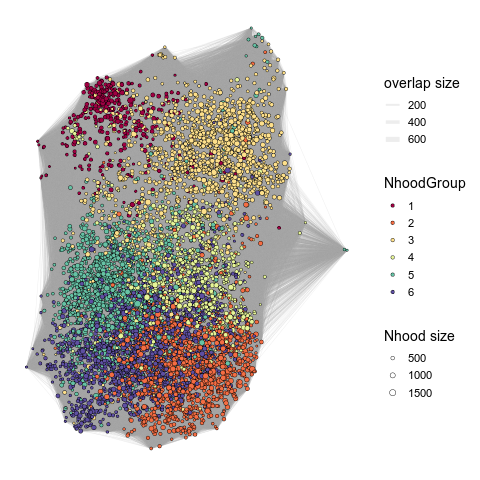

In [33]:
%%R
plotNhoodGroups(milo, DA_results, layout="UMAP")
#ggsave('nhoods_groups_milo.svg', device = svglite)

In [203]:
%%R
DA_results$n
plotNhoodGroups(milo, DA_results, layout="UMAP")
ggsave('nhoods_subset_annotation.pdf')

Saving 6.67 x 6.67 in image


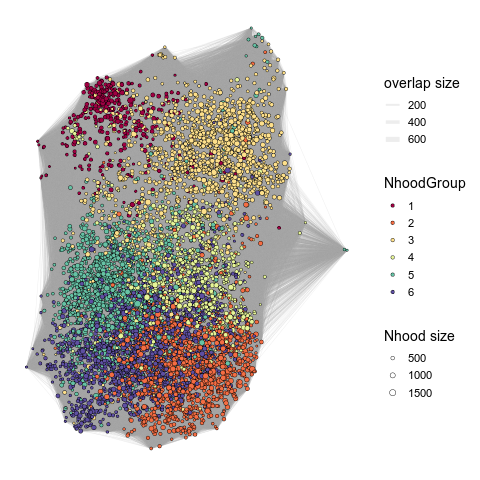

In [193]:
%%R
plotNhoodGroups(milo, DA_results, res_column='NhoodGroupTemp', layout="UMAP")
#ggsave('nhood_groups_milo.pdf')

In [400]:
%%R
## Save the adjacency matrix of the nhood graph
plotDAbeeswarm(DA_results, "subset_new")
ggsave('subset_annotation_beeswarm.svg', device=svglite)

Saving 6.67 x 6.67 in image


In [402]:
%%R
## Save the adjacency matrix of the nhood graph
plotDAbeeswarm(DA_results, "NhoodGroup")
ggsave('nhood_groups_beeswarm.svg', device=svglite)

Saving 6.67 x 6.67 in image


In [57]:
%%R
## Save the adjacency matrix of the nhood graph
plotDAbeeswarm(DA_results, "low_res_subset_celltype")
ggsave('nhood_subset_source_annotation_beeswarm.svg', device=svglite)

Saving 6.67 x 6.67 in image


In [59]:
%%R
## Save the adjacency matrix of the nhood graph
plotDAbeeswarm(DA_results, "source")
#ggsave('subset_source_beeswarm.pdf')

NULL


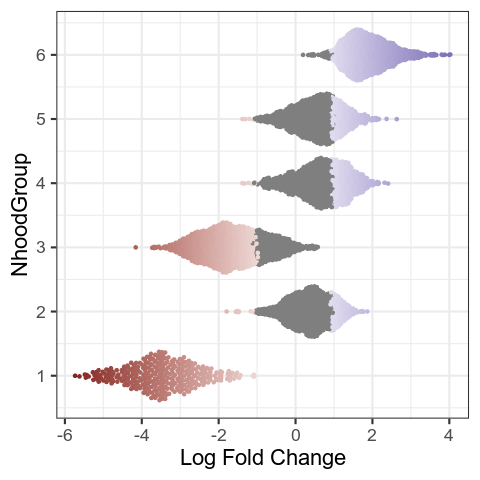

In [35]:
%%R
plotDAbeeswarm(DA_results, "NhoodGroup")

### nhood group composition

In [485]:
%%R -o nhood_counts,counts_row,counts_col
nhood_counts <- nhoodCounts(milo)
counts_row <- rownames(nhood_counts)
counts_col <- colnames(nhood_counts)

In [486]:
nhood_counts = pd.DataFrame(nhood_counts.todense(),columns=counts_col,index=counts_row)

In [487]:
%%R -o nhoods_df,nhoods_col,nhoods_row
nhoods_df <- milo@nhoods
nhoods_col <- colnames(nhoods_df)
nhoods_row <- rownames(nhoods_df)

In [488]:
nhoods_cells_df = pd.DataFrame(nhoods_df.todense(), index=nhoods_row, columns=nhoods_col)

In [489]:
nhoods_cells_df

,88026,57023,54174,22487,75675,55558,88884,46896,69277,25096,...,33577,85108,56526,31623,81317,36724,38613,35440,12527,73250
AAACCTGAGTGTCCAT_1-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACATGGGA_1-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCACCTCGGA_1-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTTGAGTTC_1-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGTCACCGTAA_1-0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TAAACCGTCTGGGCCA-1_GSM5293920_smalley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCTGGAAGTAGGACAC-1_GSM5293920_smalley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGACAACTCTCAAACG-1_GSM5293920_smalley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TGCTGCTGTGCTCTTC-1_GSM5293920_smalley,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
%%R -o nhood_ind
nhood_ind <- milo@nhoodIndex

In [330]:
#nhood_ind

In [150]:
%%R
nhood_markers <- findNhoodGroupMarkers(milo, DA_results, aggregate.samples = FALSE, sample_col = "batch")

head(nhood_markers)

  GeneID      logFC_1  adj.P.Val_1       logFC_2 adj.P.Val_2       logFC_3
1    A2M  0.004672757 5.982152e-01 -0.0088402192   0.7994573  0.0020244972
2 A4GALT -0.001651540 5.039501e-01 -0.0020885750   0.8462311  0.0041755038
3   AAAS -0.013471547 1.490546e-01  0.0214607234   0.3841638  0.0043807663
4   AACS -0.002844370 7.280910e-01 -0.0006432434   0.9811016  0.0082244707
5  AAGAB -0.007600897 5.171895e-01  0.0237569636   0.3791928  0.0006651583
6   AAK1 -0.155512792 2.656287e-10 -0.0564779778   0.5663476 -0.0986023400
   adj.P.Val_3      logFC_4  adj.P.Val_4      logFC_5  adj.P.Val_5      logFC_6
1 7.446658e-01  0.014898881 5.828936e-05  0.010962810 3.289900e-07 -0.011596786
2 3.543144e-04  0.002591062 2.676159e-02  0.001767828 6.039239e-03 -0.002501963
3 5.277713e-01 -0.000792057 9.201354e-01 -0.004572988 1.196582e-01  0.002784116
4 4.390981e-02 -0.001616266 7.627375e-01  0.005313536 9.387936e-03 -0.004603548
5 9.465614e-01 -0.004612708 5.176825e-01 -0.001855805 6.092274e-01  0.00215

In [217]:
%%R -o nhood_markers_test
nhood_markers_test <- findNhoodGroupMarkers(milo, DA_results, aggregate.samples = TRUE, 
                                       sample_col = "batch", subset.nhoods=(DA_results$NhoodGroup %in% c('1','3')))

head(nhood_markers_test)

  GeneID       logFC_1 adj.P.Val_1       logFC_3 adj.P.Val_3
1    A2M  1.997049e-02   0.3222693 -1.997049e-02   0.3222693
2 A4GALT  1.345843e-03   0.6057374 -1.345843e-03   0.6057374
3   AAAS -5.142422e-03   0.8431142  5.142422e-03   0.8431142
4   AACS -2.686810e-03   0.8410409  2.686810e-03   0.8410409
5  AAGAB  3.006024e-05   0.9983247 -3.006024e-05   0.9983247
6   AAK1  4.233891e-02   0.5510481 -4.233891e-02   0.5510481


In [211]:
nhood_markers_test

,GeneID,logFC_1,adj.P.Val_1,logFC_3,adj.P.Val_3
1,A2M,0.001133,0.998715,-0.001133,0.998715
2,A4GALT,0.002309,0.933616,-0.002309,0.933616
3,AAAS,0.011273,0.945119,-0.011273,0.945119
4,AACS,0.006473,0.788435,-0.006473,0.788435
5,AAGAB,-0.009519,0.954740,0.009519,0.954740
...,...,...,...,...,...
11862,ZXDB,0.000874,0.998715,-0.000874,0.998715
11863,ZXDC,-0.004248,0.939045,0.004248,0.939045
11864,ZYG11B,-0.006976,0.964214,0.006976,0.964214
11865,ZYX,0.017603,0.976978,-0.017603,0.976978


In [39]:
%%R
nhood_markers <- findNhoodGroupMarkers(milo, DA_results, aggregate.samples = TRUE, 
                                       sample_col = "replicate")

head(nhood_markers)

  GeneID      logFC_1 adj.P.Val_1      logFC_2 adj.P.Val_2      logFC_3
1    A2M  0.024279890   0.6538325  0.007867193   0.8587029 -0.021132616
2 A4GALT -0.001394806   0.7303831 -0.001365216   0.6766552  0.004257729
3   AAAS -0.006096756   0.7794388  0.021476582   0.1303779 -0.005535203
4   AACS -0.010618163   0.6383516  0.014307086   0.3876912  0.010782708
5  AAGAB -0.028223977   0.5083739  0.035252274   0.2531678  0.007123053
6   AAK1 -0.134669378   0.2180178 -0.020274969   0.8555803  0.049630416
  adj.P.Val_3       logFC_4 adj.P.Val_4       logFC_5 adj.P.Val_5      logFC_6
1  0.72920891 -0.0052351253   0.9447867  0.0138260119   0.9997746 -0.004598745
2  0.03257042  0.0005654893   0.9160080 -0.0009343932   0.9997746 -0.002369342
3  0.84174098  0.0112623521   0.6952536 -0.0053299025   0.9997746 -0.010163687
4  0.61380817 -0.0171746046   0.3579205  0.0086585676   0.9997746 -0.005423448
5  0.89693071 -0.0163230523   0.8003711  0.0018004919   0.9997746  0.001010796
6  0.76313599  0.09770

In [40]:
%%R -o nhood_markers
head(nhood_markers)

  GeneID      logFC_1 adj.P.Val_1      logFC_2 adj.P.Val_2      logFC_3
1    A2M  0.024279890   0.6538325  0.007867193   0.8587029 -0.021132616
2 A4GALT -0.001394806   0.7303831 -0.001365216   0.6766552  0.004257729
3   AAAS -0.006096756   0.7794388  0.021476582   0.1303779 -0.005535203
4   AACS -0.010618163   0.6383516  0.014307086   0.3876912  0.010782708
5  AAGAB -0.028223977   0.5083739  0.035252274   0.2531678  0.007123053
6   AAK1 -0.134669378   0.2180178 -0.020274969   0.8555803  0.049630416
  adj.P.Val_3       logFC_4 adj.P.Val_4       logFC_5 adj.P.Val_5      logFC_6
1  0.72920891 -0.0052351253   0.9447867  0.0138260119   0.9997746 -0.004598745
2  0.03257042  0.0005654893   0.9160080 -0.0009343932   0.9997746 -0.002369342
3  0.84174098  0.0112623521   0.6952536 -0.0053299025   0.9997746 -0.010163687
4  0.61380817 -0.0171746046   0.3579205  0.0086585676   0.9997746 -0.005423448
5  0.89693071 -0.0163230523   0.8003711  0.0018004919   0.9997746  0.001010796
6  0.76313599  0.09770

In [60]:
%%R
nhood_markers <- findNhoodGroupMarkers(milo, DA_results, aggregate.samples = FALSE, 
                                       sample_col = "replicate", subset.nhoods=(DA_results$NhoodGroup %in% c('1','3')))

head(nhood_markers)

  GeneID      logFC_1  adj.P.Val_1      logFC_3  adj.P.Val_3
1    A2M  0.010178479 1.744898e-02 -0.010178479 1.744898e-02
2 A4GALT -0.000283680 8.545722e-01  0.000283680 8.545722e-01
3   AAAS -0.006400328 2.802396e-01  0.006400328 2.802396e-01
4   AACS -0.001681451 7.425932e-01  0.001681451 7.425932e-01
5  AAGAB -0.004395423 5.416891e-01  0.004395423 5.416891e-01
6   AAK1 -0.084573268 2.304295e-07  0.084573268 2.304295e-07


In [61]:
%%R -o nhood_markers
head(nhood_markers)

  GeneID      logFC_1  adj.P.Val_1      logFC_3  adj.P.Val_3
1    A2M  0.010178479 1.744898e-02 -0.010178479 1.744898e-02
2 A4GALT -0.000283680 8.545722e-01  0.000283680 8.545722e-01
3   AAAS -0.006400328 2.802396e-01  0.006400328 2.802396e-01
4   AACS -0.001681451 7.425932e-01  0.001681451 7.425932e-01
5  AAGAB -0.004395423 5.416891e-01  0.004395423 5.416891e-01
6   AAK1 -0.084573268 2.304295e-07  0.084573268 2.304295e-07


In [128]:
nhood_markers['adj.P.Val_3'] = nhood_markers['adj.P.Val_3'] + np.min(nhood_markers[nhood_markers['adj.P.Val_3'] != 0.0]['adj.P.Val_3'])

In [129]:
nhood_markers['adj.P.Val_1'] = nhood_markers['adj.P.Val_1'] + np.min(nhood_markers[nhood_markers['adj.P.Val_3'] != 0.0]['adj.P.Val_3'])

In [260]:
nhood_group=1
nhood_markers_group = nhood_markers_test[['GeneID', f'logFC_{nhood_group}', f'adj.P.Val_{nhood_group}']].copy()
nhood_markers_group.index = nhood_markers_group['GeneID']
nhood_markers_group['rank'] = nhood_markers_group[f'logFC_{nhood_group}']*-np.log10(nhood_markers_group[f'adj.P.Val_{nhood_group}'])
nhood_markers_group = nhood_markers_group['rank']
nhood_markers_group.index.name = None
nhood_markers_group = pd.DataFrame(nhood_markers_group)
nhood_markers_group.sort_values('rank', ascending=False)['rank'].to_csv(f'nhood_markers_rank_group_{nhood_group}.rnk', header=False, sep='\t')

In [258]:
nhood_markers_group.sort_values('rank', ascending=False)['rank']

CD7         10.780615
FCER1G       8.019745
GNLY         6.475595
HCST         5.648914
IFITM2       4.742797
              ...    
UBC        -12.520714
HSPA1B     -13.470368
HSPA1A     -16.271403
DNAJB1     -21.250112
HSP90AA1   -25.033505
Name: rank, Length: 11866, dtype: float64

In [256]:
nhood_markers_group

,rank
A2M,-9.821109e-03
A4GALT,-2.930110e-04
AAAS,3.811235e-04
AACS,2.020021e-04
AAGAB,-2.188948e-08
...,...
ZXDB,-8.465290e-05
ZXDC,6.118865e-04
ZYG11B,-5.828561e-04
ZYX,5.770931e-04


In [63]:
from bioinfokit import analys, visuz

In [239]:
lfc = 0.5
nhood_group = 3

visuz.GeneExpression.volcano(df=nhood_markers_test, lfc=f'logFC_{nhood_group}', pv=f'adj.P.Val_{nhood_group}', 
                             show=False, geneid='GeneID', axtickfontname="DejaVu Sans", axlabelfontname="DejaVu Sans", 
                             genenames=tuple(nhood_markers_test[((nhood_markers_test[f'logFC_{nhood_group}'] > lfc) | (nhood_markers_test[f'logFC_{nhood_group}'] < -lfc)) & (nhood_markers_test[f'adj.P.Val_{nhood_group}'] < 0.05)]['GeneID']),
                             gstyle=1, lfc_thr=(lfc, lfc), pv_thr=(0.05, 0.05), figname=f'nhood_aggregate_samples_group_{nhood_group}_markers', figtype='svg')

In [223]:
lfc = 0.5
nhood_group = 3

visuz.GeneExpression.volcano(df=nhood_markers, lfc=f'logFC_{nhood_group}', pv=f'adj.P.Val_{nhood_group}', 
                             show=False, geneid='GeneID', axtickfontname="DejaVu Sans", axlabelfontname="DejaVu Sans", 
                             genenames=tuple(nhood_markers[((nhood_markers[f'logFC_{nhood_group}'] > lfc) | (nhood_markers[f'logFC_{nhood_group}'] < -lfc)) & (nhood_markers[f'adj.P.Val_{nhood_group}'] < 0.05)]['GeneID']),
                             gstyle=1, lfc_thr=(lfc, lfc), pv_thr=(0.05, 0.05), figname=f'nhood_group_{nhood_group}_markers', figtype='svg')

In [224]:
#lfc = 0.5
#nhood_group = 1

visuz.GeneExpression.volcano(df=nhood_markers, lfc=f'logFC_{nhood_group}', pv=f'adj.P.Val_{nhood_group}', 
                             show=False, geneid='GeneID', axtickfontname="DejaVu Sans", axlabelfontname="DejaVu Sans", 
                             #genenames=tuple(nhood_markers[((nhood_markers[f'logFC_{nhood_group}'] > lfc) | (nhood_markers[f'logFC_{nhood_group}'] < -lfc)) & (nhood_markers[f'adj.P.Val_{nhood_group}'] < 0.05)]['GeneID']),
                             gstyle=1, lfc_thr=(lfc, lfc), pv_thr=(0.05, 0.05), figname=f'nhood_group_{nhood_group}_markers_no_gene_names', figtype='svg')

In [225]:
nhood_markers[((nhood_markers[f'logFC_{nhood_group}'] > lfc) | (nhood_markers[f'logFC_{nhood_group}'] < -lfc)) & 
                  (nhood_markers[f'adj.P.Val_{nhood_group}'] < 0.05)][['GeneID',f'logFC_{nhood_group}',f'adj.P.Val_{nhood_group}']].to_csv(f'top_markers_group_{nhood_group}.csv')

In [74]:
%%R
nhood_markers_dim <- findNhoodGroupMarkers(milo, DA_results, aggregate.samples = FALSE, 
                                       sample_col = "replicate", subset.nhoods=(DA_results$NhoodGroup %in% c('2','4','5','6')))

head(nhood_markers_dim)

  GeneID       logFC_2  adj.P.Val_2       logFC_4  adj.P.Val_4      logFC_5
1    A2M -6.204804e-03 4.400055e-01  0.0165894477 2.571956e-06  0.014240863
2 A4GALT  6.588790e-06 9.979586e-01  0.0028907719 5.905846e-03  0.002314983
3   AAAS  1.427425e-02 6.680928e-02 -0.0002774888 9.709331e-01 -0.006296454
4   AACS  6.932261e-04 9.472623e-01 -0.0008655653 8.696031e-01  0.005941925
5  AAGAB  1.101925e-02 2.865703e-01 -0.0053956473 4.127595e-01 -0.001224413
6   AAK1 -9.322931e-02 2.208588e-05 -0.0544924795 2.319847e-04 -0.047388486
   adj.P.Val_5      logFC_6  adj.P.Val_6
1 1.023065e-12 -0.014946033 1.291800e-17
2 5.326353e-05 -0.002617715 1.299050e-07
3 1.635221e-02  0.003116296 1.990339e-01
4 2.048913e-03 -0.004494338 8.849008e-03
5 7.329404e-01  0.001010343 7.451186e-01
6 8.504009e-09  0.064558065 1.107103e-19


In [230]:
%%R
nhood_markers_dim_test <- findNhoodGroupMarkers(milo, DA_results, aggregate.samples = TRUE, 
                                       sample_col = "batch", subset.nhoods=(DA_results$NhoodGroup %in% c('2','4','5','6')))

head(nhood_markers_dim_test)

  GeneID       logFC_2 adj.P.Val_2      logFC_4 adj.P.Val_4       logFC_5
1    A2M -0.0153540415   0.2531728  0.010311710  0.48024001  2.582006e-03
2 A4GALT -0.0006684001   0.8307860  0.002108127  0.44211591 -1.264093e-05
3   AAAS  0.0149128893   0.2981274  0.005175823  0.78018132 -8.176393e-03
4   AACS  0.0084748752   0.3994319 -0.017162440  0.01866163  4.087955e-03
5  AAGAB  0.0088069684   0.5823282  0.006768077  0.70190698  2.945009e-05
6   AAK1 -0.0030483347   0.9567410  0.032226852  0.49363327 -1.166805e-02
  adj.P.Val_5      logFC_6 adj.P.Val_6
1   0.9410277 -0.001291745   0.9663846
2   0.9981799 -0.001349305   0.7568324
3   0.7637910 -0.005713737   0.8147894
4   0.8440951  0.004647384   0.7769355
5   0.9984614 -0.011798317   0.5518107
6   0.9123647 -0.013110418   0.8756365


In [232]:
%%R -o nhood_markers_dim_test
head(nhood_markers_dim_test)

  GeneID       logFC_2 adj.P.Val_2      logFC_4 adj.P.Val_4       logFC_5
1    A2M -0.0153540415   0.2531728  0.010311710  0.48024001  2.582006e-03
2 A4GALT -0.0006684001   0.8307860  0.002108127  0.44211591 -1.264093e-05
3   AAAS  0.0149128893   0.2981274  0.005175823  0.78018132 -8.176393e-03
4   AACS  0.0084748752   0.3994319 -0.017162440  0.01866163  4.087955e-03
5  AAGAB  0.0088069684   0.5823282  0.006768077  0.70190698  2.945009e-05
6   AAK1 -0.0030483347   0.9567410  0.032226852  0.49363327 -1.166805e-02
  adj.P.Val_5      logFC_6 adj.P.Val_6
1   0.9410277 -0.001291745   0.9663846
2   0.9981799 -0.001349305   0.7568324
3   0.7637910 -0.005713737   0.8147894
4   0.8440951  0.004647384   0.7769355
5   0.9984614 -0.011798317   0.5518107
6   0.9123647 -0.013110418   0.8756365


In [252]:
lfc = 0.5
nhood_group = 2

visuz.GeneExpression.volcano(df=nhood_markers_dim_test, lfc=f'logFC_{nhood_group}', pv=f'adj.P.Val_{nhood_group}', 
                             #color=("grey", "green", "red"),
                             show=False, geneid='GeneID', axtickfontname="DejaVu Sans", axlabelfontname="DejaVu Sans", 
                             genenames=tuple(nhood_markers_dim_test[((nhood_markers_dim_test[f'logFC_{nhood_group}'] > lfc) | (nhood_markers_dim_test[f'logFC_{nhood_group}'] < -lfc)) & (nhood_markers_dim_test[f'adj.P.Val_{nhood_group}'] < 0.05)]['GeneID']),
                             gstyle=1, lfc_thr=(lfc, lfc), pv_thr=(0.05, 0.05), figname=f'nhood_aggregate_samples_group_{nhood_group}_markers', figtype='svg')

In [204]:
lfc = 0.5
nhood_group = 5

visuz.GeneExpression.volcano(df=nhood_markers_dim, lfc=f'logFC_{nhood_group}', pv=f'adj.P.Val_{nhood_group}', 
                             #color=("grey", "green", "red"),
                             show=False, geneid='GeneID', axtickfontname="DejaVu Sans", axlabelfontname="DejaVu Sans", 
                             genenames=tuple(nhood_markers_dim[((nhood_markers_dim[f'logFC_{nhood_group}'] > lfc) | (nhood_markers_dim[f'logFC_{nhood_group}'] < -lfc)) & (nhood_markers_dim[f'adj.P.Val_{nhood_group}'] < 0.05)]['GeneID']),
                             gstyle=1, lfc_thr=(lfc, lfc), pv_thr=(0.05, 0.05), figname=f'nhood_group_{nhood_group}_markers', figtype='svg')

In [205]:
#lfc = 0.5
#nhood_group = 6

visuz.GeneExpression.volcano(df=nhood_markers_dim, lfc=f'logFC_{nhood_group}', pv=f'adj.P.Val_{nhood_group}', 
                             #color=("grey", "green", "red"),
                             show=False, geneid='GeneID', axtickfontname="DejaVu Sans", axlabelfontname="DejaVu Sans", 
                             #genenames=tuple(nhood_markers_dim[((nhood_markers_dim[f'logFC_{nhood_group}'] > lfc) | (nhood_markers_dim[f'logFC_{nhood_group}'] < -lfc)) & (nhood_markers_dim[f'adj.P.Val_{nhood_group}'] < 0.05)]['GeneID']),
                             gstyle=1, lfc_thr=(lfc, lfc), pv_thr=(0.05, 0.05), figname=f'nhood_group_{nhood_group}_markers_no_gene_names', figtype='svg')

In [206]:
nhood_markers_dim[((nhood_markers_dim[f'logFC_{nhood_group}'] > lfc) | (nhood_markers_dim[f'logFC_{nhood_group}'] < -lfc)) & 
                  (nhood_markers_dim[f'adj.P.Val_{nhood_group}'] < 0.05)][['GeneID',f'logFC_{nhood_group}',f'adj.P.Val_{nhood_group}']].to_csv(f'top_markers_group_{nhood_group}.csv')